## Observations and Insights 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
count = combined_df["Mouse ID"].count()
count

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_count_df = combined_df.drop_duplicates("Mouse ID")
mouse_count_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df =combined_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
cleaned_count = cleaned_df["Mouse ID"].count()
cleaned_count

1888

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
mean = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

stats_df = pd.DataFrame({"Mean": mean,
                        "Median": median,
                        "Variance": variance,
                        "Standard Deviation": std_dev,
                        "SEM": sem})

stats_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

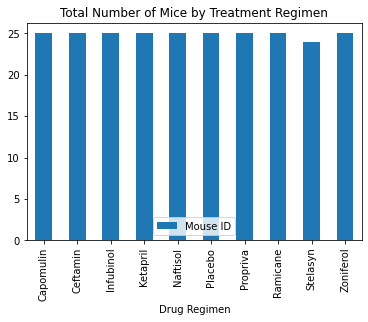

In [19]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

treatment_data = pd.DataFrame(mouse_count_df.groupby(["Drug Regimen"]).count()).reset_index()

count_by_treatment_df = treatment_data[["Mouse ID", "Drug Regimen"]]
count_by_treatment_df = count_by_treatment_df.set_index("Drug Regimen")

#count_by_treatment_df

count_by_treatment_df.plot(kind="bar")
plt.title("Total Number of Mice by Treatment Regimen")
plt.show()

Text(0, 0.5, 'Mouse Count')

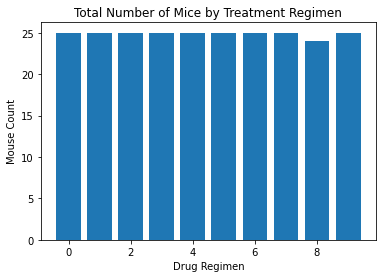

In [38]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(count_by_treatment_df))
tick_locations = [value+0.0 for value in x_axis]

plt.bar(x_axis, count_by_treatment_df["Mouse ID"])
#plt.xticks(tick_locations, mouse_count_df["Drug Regimen"], rotation="vertical")

plt.title("Total Number of Mice by Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mouse Count")


Text(0, 0.5, '')

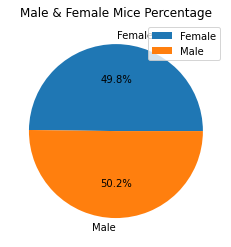

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_group = pd.DataFrame(mouse_count_df.groupby(['Sex']).count()).reset_index()

gender_count_df = gender_group[["Sex","Mouse ID"]]



plot = gender_count_df.plot.pie(y = "Mouse ID", autopct='%1.1f%%', labels=gender_count_df["Sex"])

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")

<function matplotlib.pyplot.show(*args, **kw)>

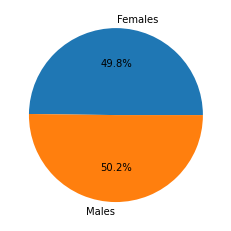

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


gender_count = (mouse_count.groupby(["Sex"])["Mouse ID"].count()).tolist()

labels = ['Females', 'Males']

plt.pie(gender_count, labels=labels, autopct="%1.1f%%")


plt.show

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
